In [1]:
import pandas as pd
import numpy as np
import h5py
from tqdm import trange

/opt/apps/rhel7/Python-GPU-3.6.5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [39]:
name = 'GO_BP'
file_name = "GO_Biological_Process_2018.txt"
new_gslibs = h5py.File("two_gslibs.hdf5", "r+")

# Preprocessing 

Converting the text file into a dictionary in which each phenotype is a key and its associated genes are in a list as a value.

In [40]:
d = {} 
with open(file_name) as file:
    for line in file:
        lst = line.strip().split("\t")
        ph = lst[0]
        lst = lst[2:]
        d[ph] = lst

In [41]:
d

{'positive regulation of posttranscriptional gene silencing (GO:0060148)': ['FXR1',
  'ZFP36',
  'DHX9',
  'XPO5',
  'FMR1',
  'STAT3',
  'WTIP',
  'PUM2',
  'AJUBA',
  'PUM1',
  'LIMD1'],
 'regulation of cell cycle process (GO:0010564)': ['UVRAG',
  'SH3GLB1',
  'RMI2',
  'CAV2',
  'HMGA2',
  'PRPF40A',
  'ZFYVE26',
  'KLHL21',
  'CDC25C',
  'APC',
  'CDK5',
  'CDC16',
  'CCP110',
  'KLHL9',
  'CCDC8',
  'SLC25A33',
  'KIF20A',
  'CDK13',
  'PIK3C3',
  'KIF20B',
  'OBSL1',
  'CALM2',
  'CALM3',
  'CALM1',
  '',
  'L3MBTL1',
  'AHCTF1',
  'SDCCAG3',
  'CETN2',
  'AURKA',
  'PIK3R4',
  'SFRP1',
  'AURKC',
  'PDXP',
  'AURKB',
  'FBXO43',
  'KNSTRN',
  'RACGAP1',
  'GPER1',
  'FSD1',
  'AKT2',
  'E4F1',
  'RPRD1B',
  'ECT2',
  'RAB11FIP3',
  'TIPIN',
  'RAB11FIP4',
  'LINC00598',
  'NEUROD1',
  'BBS4',
  'YTHDF2',
  'PLK1',
  'CSNK2A2',
  'BORA',
  'CSNK2A1',
  'PLK3',
  'PRMT5',
  'DAPK3',
  'SPAG5',
  'PRC1',
  'MYO19',
  'RAB11A',
  'CDC42',
  'BIN1',
  'BCL2L1',
  'BIRC6',
  'MAD1L1'

Creating the reverse of the above dictionary, in which each gene is a key and its value is a list of its associated phenotypes.

In [42]:
gene_dict = {}
for k,v in d.items(): 
    for gene in v: 
        if gene not in gene_dict: 
            gene_dict[gene] = []
        gene_dict[gene].append(k)

In [43]:
gene_dict

{'FXR1': ['positive regulation of posttranscriptional gene silencing (GO:0060148)',
  'positive regulation of macromolecule biosynthetic process (GO:0010557)',
  'regulation of dendritic spine development (GO:0060998)',
  'nervous system development (GO:0007399)',
  'negative regulation of cellular protein metabolic process (GO:0032269)',
  'positive regulation of cellular protein metabolic process (GO:0032270)',
  'positive regulation of translation (GO:0045727)',
  'negative regulation of translation (GO:0017148)',
  'regulation of dendrite development (GO:0050773)',
  'negative regulation of cellular amide metabolic process (GO:0034249)',
  'regulation of dendrite morphogenesis (GO:0048814)',
  'negative regulation of gene expression (GO:0010629)',
  'anterograde axonal transport (GO:0008089)',
  'positive regulation of gene silencing by miRNA (GO:2000637)',
  'regulation of cell morphogenesis involved in differentiation (GO:0010769)',
  'negative regulation of cellular macromolecul

Create a list of functions and genes in the correct index order for the gene set matrix, which is a binary matrix with genes as rows and functions or phenotypes as columns. If the gene is associated with a phenotype, the corresponding cells receives a value of 1. Otherwise, the cell receives a value of 0.
It is possible to use a list of keys since Python dictionaries are unordered such that their order is dictated by when they were entered rather than their alphanumeric order.

In [44]:
functions = list(d.keys())
gslib_genes = list(gene_dict.keys())
gene_set = np.zeros((len(gslib_genes), len(functions)))

In [45]:
for row in range(len(gene_set)): 
    gene = gslib_genes[row] 
    for col in range(len(functions)):
        f = functions[col]
        if f in gene_dict[gene]: 
            gene_set[row][col] = 1

In [46]:
pd.DataFrame(gene_set)

0     1     2     3     4     5     6     7     8     9     ...  5093  \
0       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
5       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
6       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
7       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
8       1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  ...   0.0   
9       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
10      1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
11      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
12      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
13      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
15      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
16      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
17      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
18      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
19      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
20      0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  ...   0.0   
21      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
22      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
23      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
24      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
25      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
26      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
27      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
29      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
14403   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14404   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14405   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14406   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14407   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14408   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14409   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14410   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14411   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14412   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14413   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14414   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14415   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14416   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14417   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14418   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14419   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14420   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14421  

In [47]:
print(len(gslib_genes))
print(len(functions))

14433
5103


In [48]:
# new_gslibs.create_dataset(name + "genes", data=pd.DataFrame(gslib_genes).astype("S"))

Create dictionaries to easily get the index associated with a particular gene or function for later computations.

In [49]:
gene_to_idx = {}
f_to_idx = {}
# to get index associated with a particular gene
for i in range(len(gslib_genes)): 
    gene_to_idx[gslib_genes[i]] = i
# to get index associated with particular function
for j in range(len(functions)):
    f_to_idx[functions[j]] = j

# Mouse gene set library 

To compute this new matrix (which is not a Pearson correlation matrix), I will compare each gene to every other gene in a given set, get the average correlation and save that in a matrix that has genes has rows and phenotypes as columns. 

Start by getting the correlation matrix so that the average correlation for each gene for each set is easier to compute, by just taking the average of the rest of the correlations found associated with the given set.

In [50]:
cor = np.corrcoef(gene_set)

In [51]:
# Should be a square matrix M x M in which M = # of genes
cor.shape
cor

array([[ 1.00000000e+00,  1.07957247e-01,  1.33663593e-01, ...,
        -1.03989805e-03, -1.03989805e-03, -1.03989805e-03],
       [ 1.07957247e-01,  1.00000000e+00,  1.04497057e-01, ...,
        -1.61482072e-03, -1.61482072e-03, -1.61482072e-03],
       [ 1.33663593e-01,  1.04497057e-01,  1.00000000e+00, ...,
        -1.84378652e-03, -1.84378652e-03, -1.84378652e-03],
       ...,
       [-1.03989805e-03, -1.61482072e-03, -1.84378652e-03, ...,
         1.00000000e+00, -1.96001568e-04, -1.96001568e-04],
       [-1.03989805e-03, -1.61482072e-03, -1.84378652e-03, ...,
        -1.96001568e-04,  1.00000000e+00,  1.00000000e+00],
       [-1.03989805e-03, -1.61482072e-03, -1.84378652e-03, ...,
        -1.96001568e-04,  1.00000000e+00,  1.00000000e+00]])

In [52]:
# Initialize mouse gene set library 
sim = np.zeros((len(gslib_genes), len(functions)))

In [53]:
# Convert to Pandas DataFrame to easily use 
# .iloc function, which allows row selection
cor = pd.DataFrame(cor)

Create dictionary to convert the list of genes associated with each function to their corresponding indices in the list of genes above. This would help simplify the process of taking the average of the other correlations for each set by using the .iloc function in Pandas that allows row selection.

An alternative could be to use the binary matrix to get the indices, and use the np.where(row == 1) function.

In [54]:
gene_indices = {}
for func in d:
    gene_indices[func] = [] 
    for gene in d[func]:
        gene_indices[func].append(gene_to_idx[gene])

In [55]:
gene_indices

{'positive regulation of posttranscriptional gene silencing (GO:0060148)': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10],
 'regulation of cell cycle process (GO:0010564)': [11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101],
 'angiotensin-activated signaling pathway (GO:0038166)': [102,
  103,
  104,
  105,
  106,
  107,
  108],
 'DNA-templated transcription, termination (GO:0006353)': [109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  1

Loop through the indices of functions. From gene_indices,
we can get a list of the indices of genes that are associated
with that particular set/function. We can start by selecting
a sub-correlation matrix with only the rows corresponding to
the indices chosen.

Loop through these indices. For each row index, sum its column of correlations
and subtract 1 (for the self-correlation) and divide by the 
number of indices minus 1 to get the mean correlation of this
particular gene to every other gene in this set. Those genes that are not associated with the phenotype will maintain their value of 0.

In [56]:
for j in trange(len(functions)):
    f = functions[j]
    indices = gene_indices[f] 
    n = len(indices)-1
    temp = cor.iloc[indices]
    for i in range(len(indices)):
        gene_idx = indices[i]
        gene_cor = temp.iloc[:,i]
        sim[gene_idx][j] = (sum(gene_cor)-1)/n

100%|██████████| 5103/5103 [00:47<00:00, 107.97it/s]


Check if any row sums to 0. If there is, then there is probably something wrong, because each gene is associated with at least one function.

In [57]:
for row in sim:
    if sum(row) == 0:
        print(row)

Save the mouse gene set library to HDF5 file format since it took a nontrivial amount of time to run.

In [58]:
print(sim.shape) 

(14433, 5103)


# Making predictions
In this section, I will be making predictions about the TCGA dataset based on the following formula: 

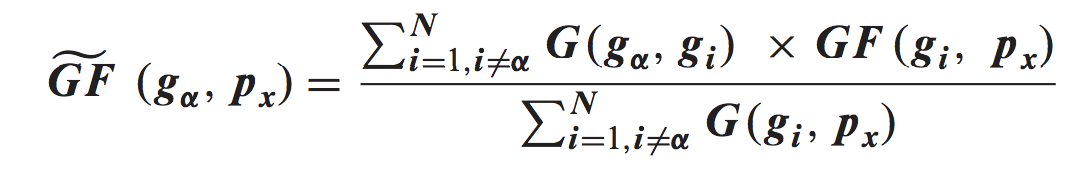

In other words, G is the TCGA correlation matrix and GF is the matrix of genes and phenotypes that have the mean correlations of a given gene to every other gene in a given set (the mouse gene set library). The goal is to be able to get the new gene set library GF' to make predictions about the TCGA dataset.

In [59]:
tcga = h5py.File("tcga.hdf5", "r+")
list(tcga.keys())

['correlation_matrix', 'data', 'meta']

In [60]:
corr = tcga['correlation_matrix']
data = tcga['data']
meta = tcga['meta']
genes = meta['genes']
eids = meta['ensembl_id']
mouse_gene_names = gslib_genes
phenotypes = functions 
mgsl = sim

Check if there are any genes in common between the mouse genes and the TCGA genes or ensembl ids. Turns out that the mouse genes are not shown as ensembl ids so we will be using TCGA gene names for comparisons.

In [61]:
phenotype_list = []
for p in phenotypes:
    phenotype_list.append(p)

In [62]:
gene_names = []
for g in genes:
    gene_names.append(str(g[0])[2:-1])

# Filling in new gene set library
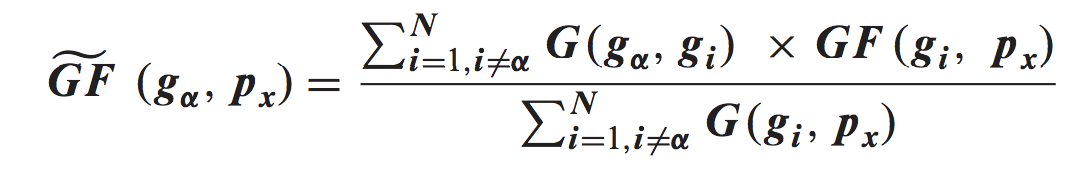

For each gene in TCGA genes for each phenotype, sum the correlation with every other gene multiplied by its correlation to the mouse gene set function, and divide the total by the correlations of the genes to the gene set function. This can be calculated by creating a new mouse gene set library that had all of the TCGA genes as rows in order, so that we may perform a dot product for the numerator and a summation in the denominator. Since self-correlations had been set to 0 in the correlation matrix, we can still dot each row of the correlation matrix with each col of the gene set library matrix to get the numerator, and the self-correlation would negate its product. For the denominator, we can sum the gene set library row but subtract the entry for the current gene.

In [63]:
# Initialize new gene set library to contain TCGA genes as rows and mouse phenotypes as columns.
gene_lib = np.zeros((len(gene_names), len(phenotype_list)))

In [64]:
"""
Expanded mouse gene set library with the same number of genes as the TCGA gene set.
We should ignore the ~3400 mouse genes not found in the TCGA gene set since they won't 
be included in the above calculations.
"""

ex_mgsl = np.zeros((len(gene_names), len(phenotype_list)))

In [65]:
# TCGA gene to index dictionary to help fill in expanded mouse gene set library 
tcga_to_idx = {} 
for g_idx in range(len(gene_names)): 
    g = gene_names[g_idx]
    tcga_to_idx[g] = g_idx

In [66]:
"""
Loop through the current mouse gene names. If the mouse gene name is found in the tcga_to_idx
dictionary, we find its index according to the TCGA gene list and replace the ex_mgsl row of 
zeros with the row found in the previous mouse gene set library. All of the genes found in the
TCGA library but not in the mouse gene set library will be left as zero for phenotype correlations.
"""
for m in range(len(mouse_gene_names)): 
    mouse_gene = mouse_gene_names[m]
    if mouse_gene in tcga_to_idx:
        idx = tcga_to_idx[mouse_gene]
        ex_mgsl[idx] = mgsl[m]  # replace expanded mgsl row with the prev mgsl row of correlations

In [67]:
# Check that our method worked and that none of the phenotype cols sum to 0. 
sums = sum(ex_mgsl)
for s in sums:
    if s == 0: 
        print(s)

In [68]:
"""
We can compute the numerator part of the matrix by multiplying matrices together.
Use Numpy rather than go through matrix manually b/c np probably has some speedy
magic we don't know about.
"""

gslib = np.matmul(corr, ex_mgsl)

In [69]:
# Check to get a new matrix with TCGA genes as rows and phenotypes of columns
gslib.shape

(38550, 5103)

In [70]:
"""
To finish computing the gene set library we have to go through each of the entries and divide
by the sum of the correlations in that phenotype's set (minus the current gene's correlation).
We can speed up computations by just taking the sums of each phenotype column. As we loop 
through the genes for each phenotype, we can just subtract the current gene's correlation
from the phenotype's sum.
"""

pheno_sums = []
for col in np.transpose(gslib):
    pheno_sums.append(sum(col))

for i in trange(len(gslib)):
    for j in range(len(phenotype_list)):
        sub = ex_mgsl[i][j]
        denom = pheno_sums[j]
        gslib[i][j] = gslib[i][j]/(denom-sub)

100%|██████████| 38550/38550 [09:19<00:00, 68.90it/s]


In [71]:
pd.DataFrame(gslib)

0         1         2         3         4         5         6     \
0      0.000846  0.000108  0.001481  0.001839 -0.001609 -0.000451  0.002233   
1     -0.000335 -0.000501  0.000697  0.000076 -0.000659 -0.000671  0.001236   
2     -0.000017  0.001014 -0.000578 -0.000064  0.000188  0.001752 -0.002467   
3      0.001585  0.000275 -0.000448 -0.000861  0.001350  0.000863 -0.001881   
4      0.000789  0.002277 -0.001104  0.000461  0.001981  0.003009 -0.003354   
5     -0.001129 -0.000890 -0.000121 -0.000731 -0.000144 -0.000923 -0.000130   
6      0.000767 -0.000706  0.001769  0.000197 -0.001485 -0.001209  0.001970   
7     -0.001543 -0.000353  0.000331  0.000472 -0.001980 -0.000506  0.000437   
8      0.000714  0.000165  0.000116  0.000037 -0.000111  0.000912 -0.000961   
9      0.002237  0.001402 -0.000854 -0.000452  0.002238  0.001653 -0.001794   
10     0.000792  0.000631 -0.000157  0.001414  0.000380  0.000749  0.000133   
11     0.001563 -0.000452  0.000254 -0.000175  0.001343 -0.000512  0.001995   
12    -0.000778  0.001070 -0.000982  0.001330 -0.000031  0.001829 -0.001693   
13     0.000619 -0.001216  0.000082 -0.001162 -0.001001 -0.001663  0.000711   
14     0.001374  0.000187  0.000994  0.001115 -0.000832  0.000100  0.001600   
15     0.000210 -0.000310  0.000200  0.000919 -0.000622 -0.001215  0.000422   
16     0.002225  0.000672  0.001039 -0.001077  0.000701  0.000296  0.001832   
17     0.000251  0.000620  0.000617  0.000914  0.000996  0.000690 -0.000472   
18     0.002510  0.000624  0.000131 -0.001614  0.001534  0.000737  0.000369   
19     0.000649  0.000321 -0.001625 -0.001310  0.000976  0.000556 -0.001700   
20     0.000577  0.001007  0.000266  0.000578  0.000374  0.000762 -0.000677   
21    -0.002323 -0.000656  0.000265  0.001801 -0.002446 -0.000654  0.000807   
22    -0.000151  0.000240  0.001100  0.000470  0.000184  0.000288  0.001064   
23    -0.002023 -0.000220  0.000340  0.000383  0.000288 -0.000419 -0.000462   
24    -0.000226 -0.000099  0.000891  0.001291 -0.001091 -0.000768  0.001666   
25    -0.000597 -0.000645 -0.000012  0.000372 -0.001370 -0.001626  0.001127   
26     0.000224  0.000267  0.000148  0.000588  0.000782  0.000472  0.000114   
27     0.000506 -0.000008  0.001375  0.000696 -0.000491 -0.000292  0.001743   
28    -0.001636  0.000440 -0.000339  0.001744 -0.000353  0.000238 -0.000005   
29     0.000722  0.000818  0.000671  0.000232 -0.000199  0.000077  0.000639   
...         ...       ...       ...       ...       ...       ...       ...   
38520  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38521  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38522  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38523  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38524  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38525  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38526  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38527  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38528  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38529  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38530  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38531  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38532  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38533  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38534  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38535  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38536  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38537  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000 -0.000000   
38538  0.000000  0.000000 -0.000000  0.000000 -0.000000  0.00

In [72]:
new_gslibs.create_dataset("tcga_" + name, data=gslib)

<HDF5 dataset "tcga_GO_BP": shape (38550, 5103), type "<f8">

In [73]:
new_gslibs.close()

In [35]:
def rank_genes(gene_idx, gslib, phenotypes, rank):
    tups = list(dict(zip(range(len(gslib[0])), gslib[gene_idx])).items())
    tups.sort(key = lambda t: t[1], reverse = True)
    top_rank = [ t[1] for t in tups[: rank] ]
    top_int = [ t[0] for t in tups[: rank] ]
    top_pheno = [ phenotypes[i] for i in top_int ]
    return top_rank, top_pheno

In [36]:
arr = np.zeros((len(gene_names), 50))
pheno_arr = []
for gene_idx in trange(len(gene_names)):  
    row, phenos = rank_genes(gene_idx, gslib, phenotype_list, 50)
    arr[gene_idx] = row 
    pheno_arr.append(phenos)

100%|██████████| 38550/38550 [00:12<00:00, 3149.02it/s]


In [37]:
arr

array([[ 0.29877131,  0.10541843,  0.08486299, ...,  0.00455943,
         0.00452437,  0.00445046],
       [ 0.22993448,  0.03429865,  0.01627328, ...,  0.0016877 ,
         0.00167302,  0.00166603],
       [ 0.12333791,  0.09353647,  0.0899232 , ...,  0.00250522,
         0.00241165,  0.00239534],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.        ]])

In [38]:
new_gslibs.create_dataset(name, data=arr)

<HDF5 dataset "kegg_human_tcga": shape (38550, 50), type "<f8">

In [39]:
pheno_arr = pd.DataFrame(pheno_arr).astype("S")
pheno_arr

0   \
0          b'Valine, leucine and isoleucine degradation'   
1          b'Valine, leucine and isoleucine degradation'   
2                  b'Vascular smooth muscle contraction'   
3      b'Phenylalanine, tyrosine and tryptophan biosy...   
4      b'Phenylalanine, tyrosine and tryptophan biosy...   
5      b'Phenylalanine, tyrosine and tryptophan biosy...   
6          b'Valine, leucine and isoleucine degradation'   
7          b'Valine, leucine and isoleucine degradation'   
8          b'Valine, leucine and isoleucine degradation'   
9      b'Phenylalanine, tyrosine and tryptophan biosy...   
10     b'Phenylalanine, tyrosine and tryptophan biosy...   
11     b'Phenylalanine, tyrosine and tryptophan biosy...   
12                 b'Vascular smooth muscle contraction'   
13         b'Valine, leucine and isoleucine degradation'   
14                                      b'Legionellosis'   
15         b'Valine, leucine and isoleucine degradation'   
16     b'Phenylalanine, tyrosine and tryptophan biosy...   
17         b'Valine, leucine and isoleucine degradation'   
18     b'Phenylalanine, tyrosine and tryptophan biosy...   
19     b'Phenylalanine, tyrosine and tryptophan biosy...   
20     b'Phenylalanine, tyrosine and tryptophan biosy...   
21         b'Valine, leucine and isoleucine degradation'   
22                                b'Allograft rejection'   
23     b'Phenylalanine, tyrosine and tryptophan biosy...   
24                   b'Fc gamma R-mediated phagocytosis'   
25         b'Valine, leucine and isoleucine degradation'   
26     b'Phenylalanine, tyrosine and tryptophan biosy...   
27         b'Valine, leucine and isoleucine degradation'   
28                 b'Vascular smooth muscle contraction'   
29                                      b'Thermogenesis'   
...                                                  ...   
38520                                b'ABC transporters'   
38521                                b'ABC transporters'   
38522                                b'ABC transporters'   
38523                                b'ABC transporters'   
38524                                b'ABC transporters'   
38525                                b'ABC transporters'   
38526                                b'ABC transporters'   
38527                                b'ABC transporters'   
38528                                b'ABC transporters'   
38529                                b'ABC transporters'   
38530                                b'ABC transporters'   
38531                                b'ABC transporters'   
38532                                b'ABC transporters'   
38533                                b'ABC transporters'   
38534                                b'ABC transporters'   
38535                                b'ABC transporters'   
38536                                b'ABC transporters'   
38537                                b'ABC transporters'   
38538                                b'ABC transporters'   
38539                                b'ABC transporters'   
38540                                b'ABC transporters'   
38541                                b'ABC transporters'   
38542                                b'ABC transporters'   
38543                                b'ABC transporters'   
38544                                b'ABC transporters'   
38545                                b'ABC transporters'   
38546                                b'ABC transporters'   
38547                                b'ABC transporters'   
38548                                b'ABC transporters'   
38549                                b'ABC transporters'   

                                                      1   \
0                                       b'Legionellosis'   
1                                       b'Legionellosis'   
2                                b'Steroid biosynthesis'   
3                           b'Graft-versus-host disease'   
4                  b'Vascular smo

In [40]:
new_gslibs.create_dataset(name + "pheno", data=pheno_arr)

<HDF5 dataset "kegg_human_tcgapheno": shape (38550, 50), type "|S58">

In [41]:
new_gslibs.close()